## 8.5 스튜던트 t분포, 카이제곱분포, F분포

이 절에서는 정규분포에서 파생된 분포를 공부한다. 정규분포에서 생성된 표본 데이터 집합에 여러 수식을 적용하여 값을 변화시키면 데이터 집합의 분포 모양이 달라지는데 적용된 수식에 따라 스튜던트 t분포, 카이제곱분포, F분포가 만들어진다. 이 분포들은 통계량 분포라고도 부르는데 나중에 공부할 가설 검정에 쓰인다. 

### 스튜던트 t분포

현실의 데이터를 살펴보면 정규분포와 상당히 유사하지만 양 끝단의 비중이 정규분포에 비해 더 큰 데이터들을 발견할 수 있다. 정규분포라 가정했을 때보다 극단적 현상이 더 자주 발생한다는 뜻이다. 분포의 모양을 볼 때 양 끝(꼬리) 부분이 정규분포보다 두껍다고 해서 이를 팻 테일(fat tail) 현상이라고 한다. 예를 들어 주식의 수익률은 보통 정규분포를 따르는 것으로 가정하는데 실제로는 정규분포에서는 자주 발생할 수 없는 극단적인 사건들이 종종 발생하곤 한다. 금융시장에서는 이러한 현상을 블랙 스완(black swan)이라고도 한다. 

실제로 과거의 주가 데이터를 확인해보자. 다음은 S&P 500, 나스닥(Nasdaq), 다우존스(Dow-Jones), 니케이255(Nikkei255) 네 가지의 주가지수 데이터다. 비교를 위해 2010년의 값을 100으로 통일하였다.

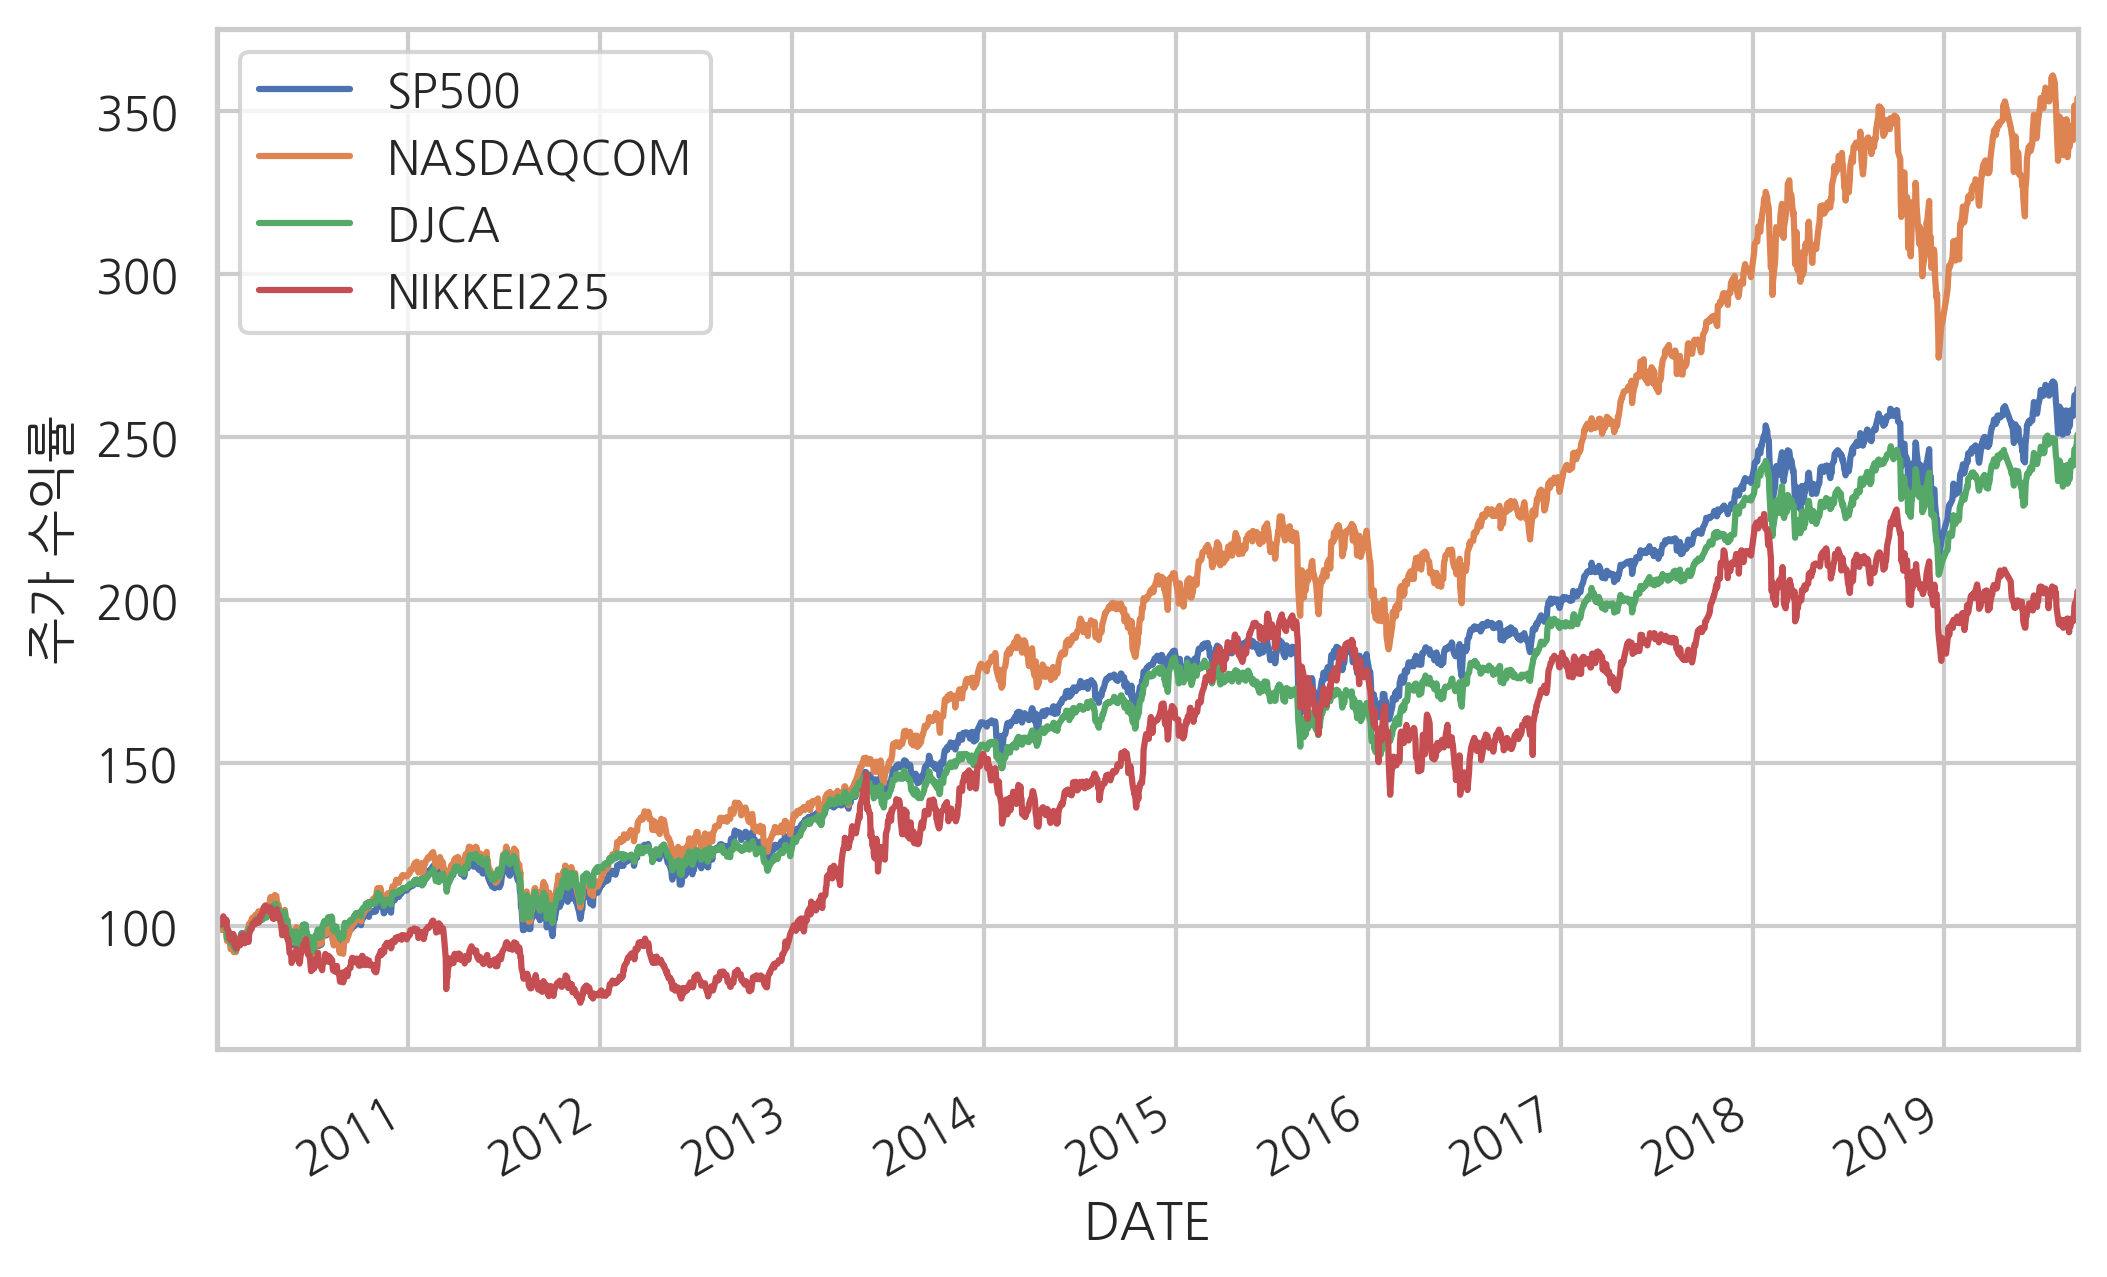

In [1]:
import pandas_datareader.data as web

symbols = ['SP500', 'NASDAQCOM', 'DJCA', 'NIKKEI225']
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='fred')[sym]
data = data.dropna()
(data / data.iloc[0] * 100).plot()

plt.ylabel("날짜")
plt.ylabel("주가 수익률")
plt.show()

이 데이터에서 각 지수의 일간 수익률을 구하여 그 분포의 모양을 히스토그램으로 그리면 정규분포와 비슷하게 생겼다.

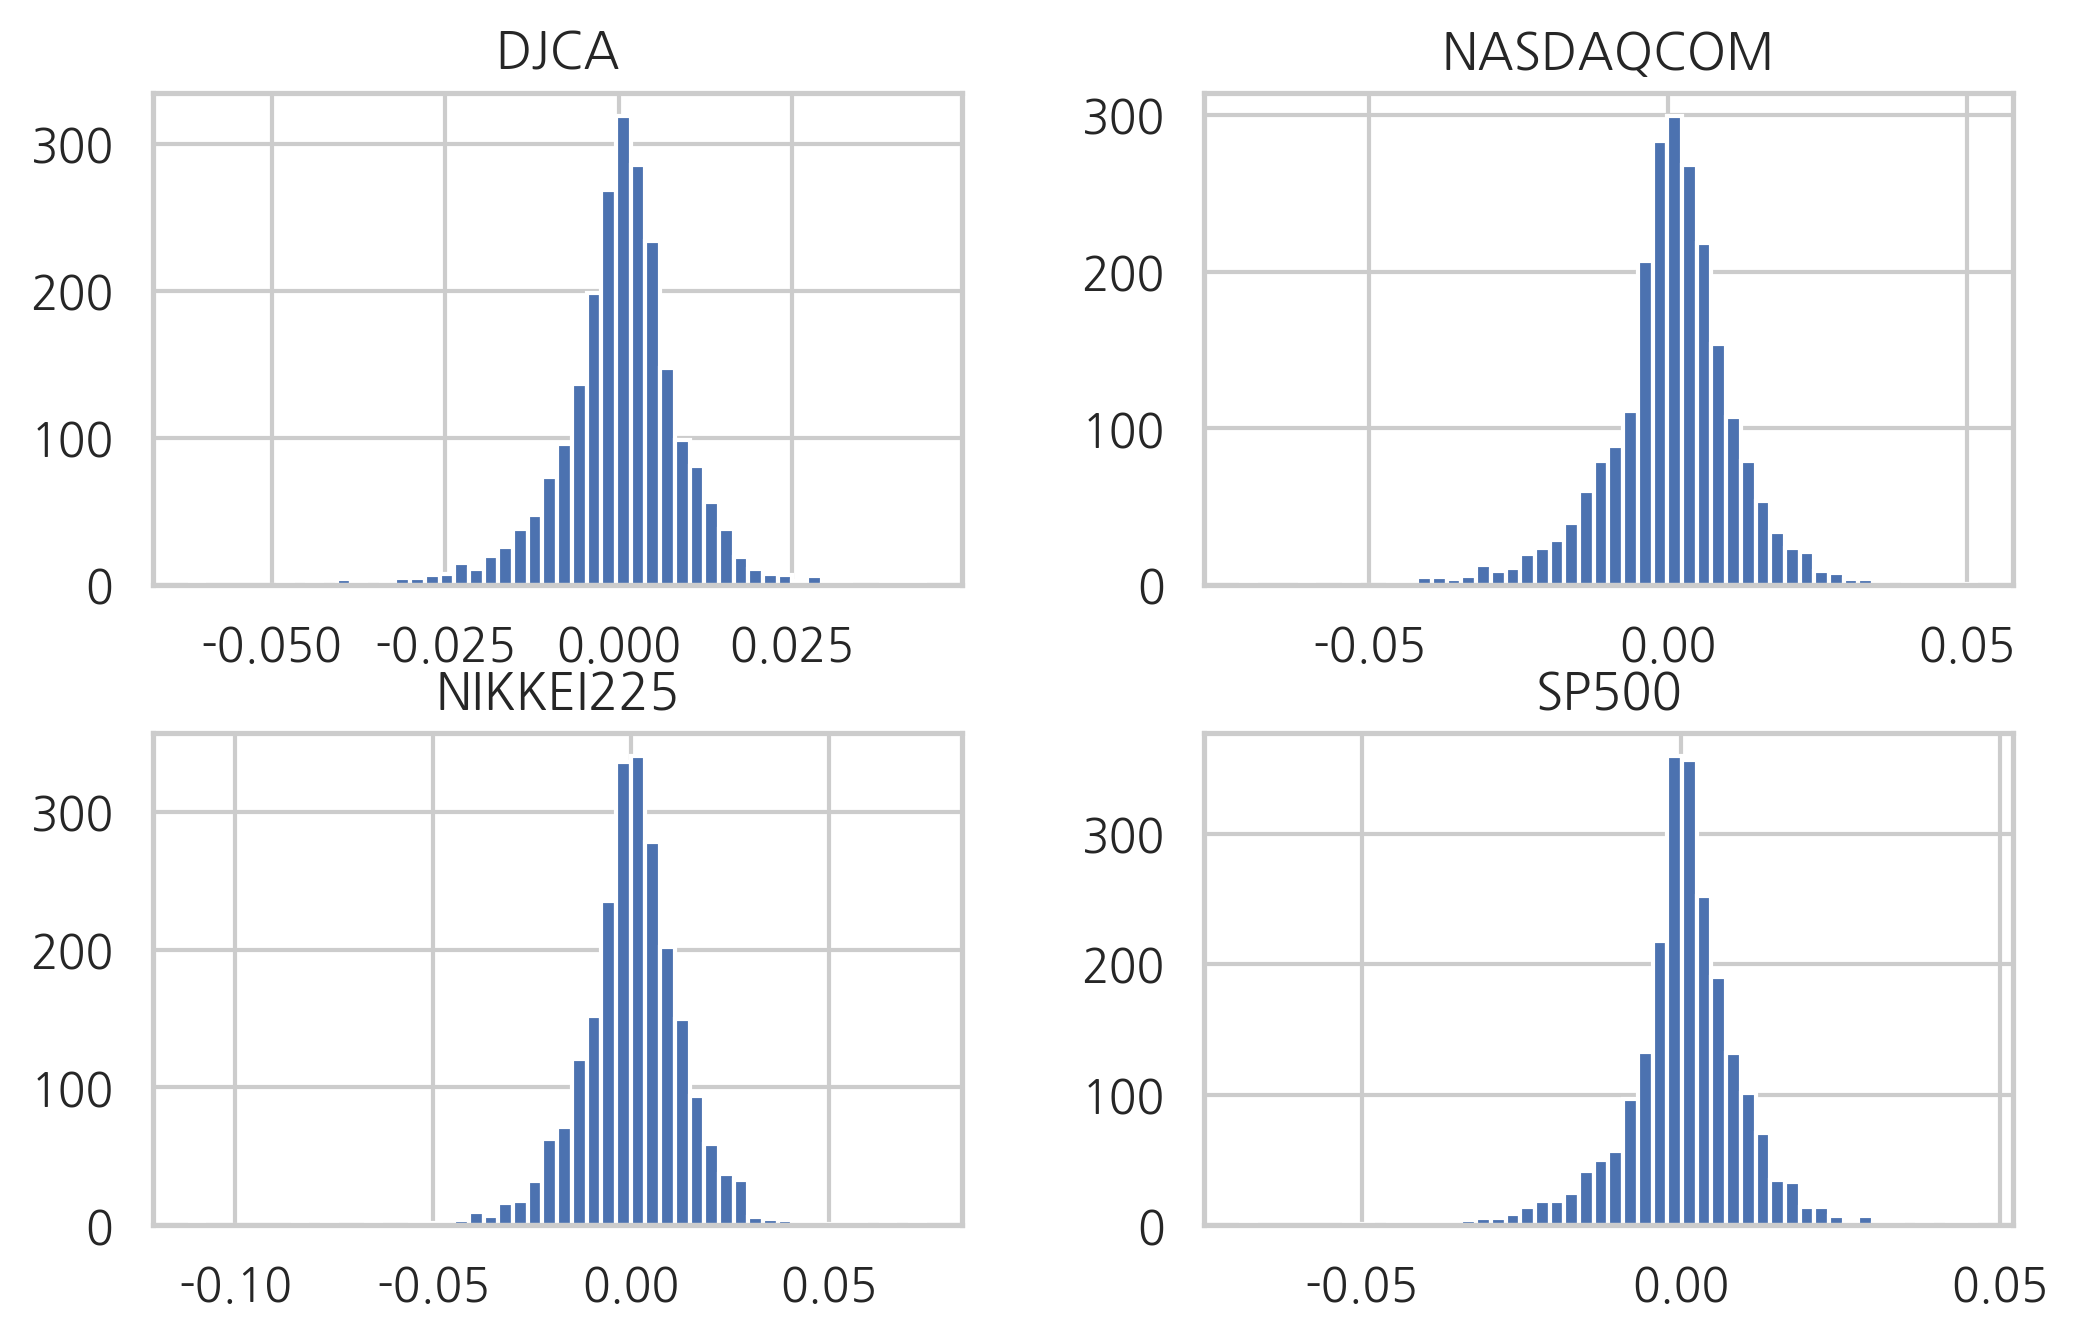

In [2]:
log_returns = np.log(data / data.shift(1))
log_returns.hist(bins=50)
plt.show()

하지만 Q-Q 플롯으로 정규성을 확인하면 정규분포보다 더 극단적인 경우가 많이 발생하고 있음을 알 수 있다.

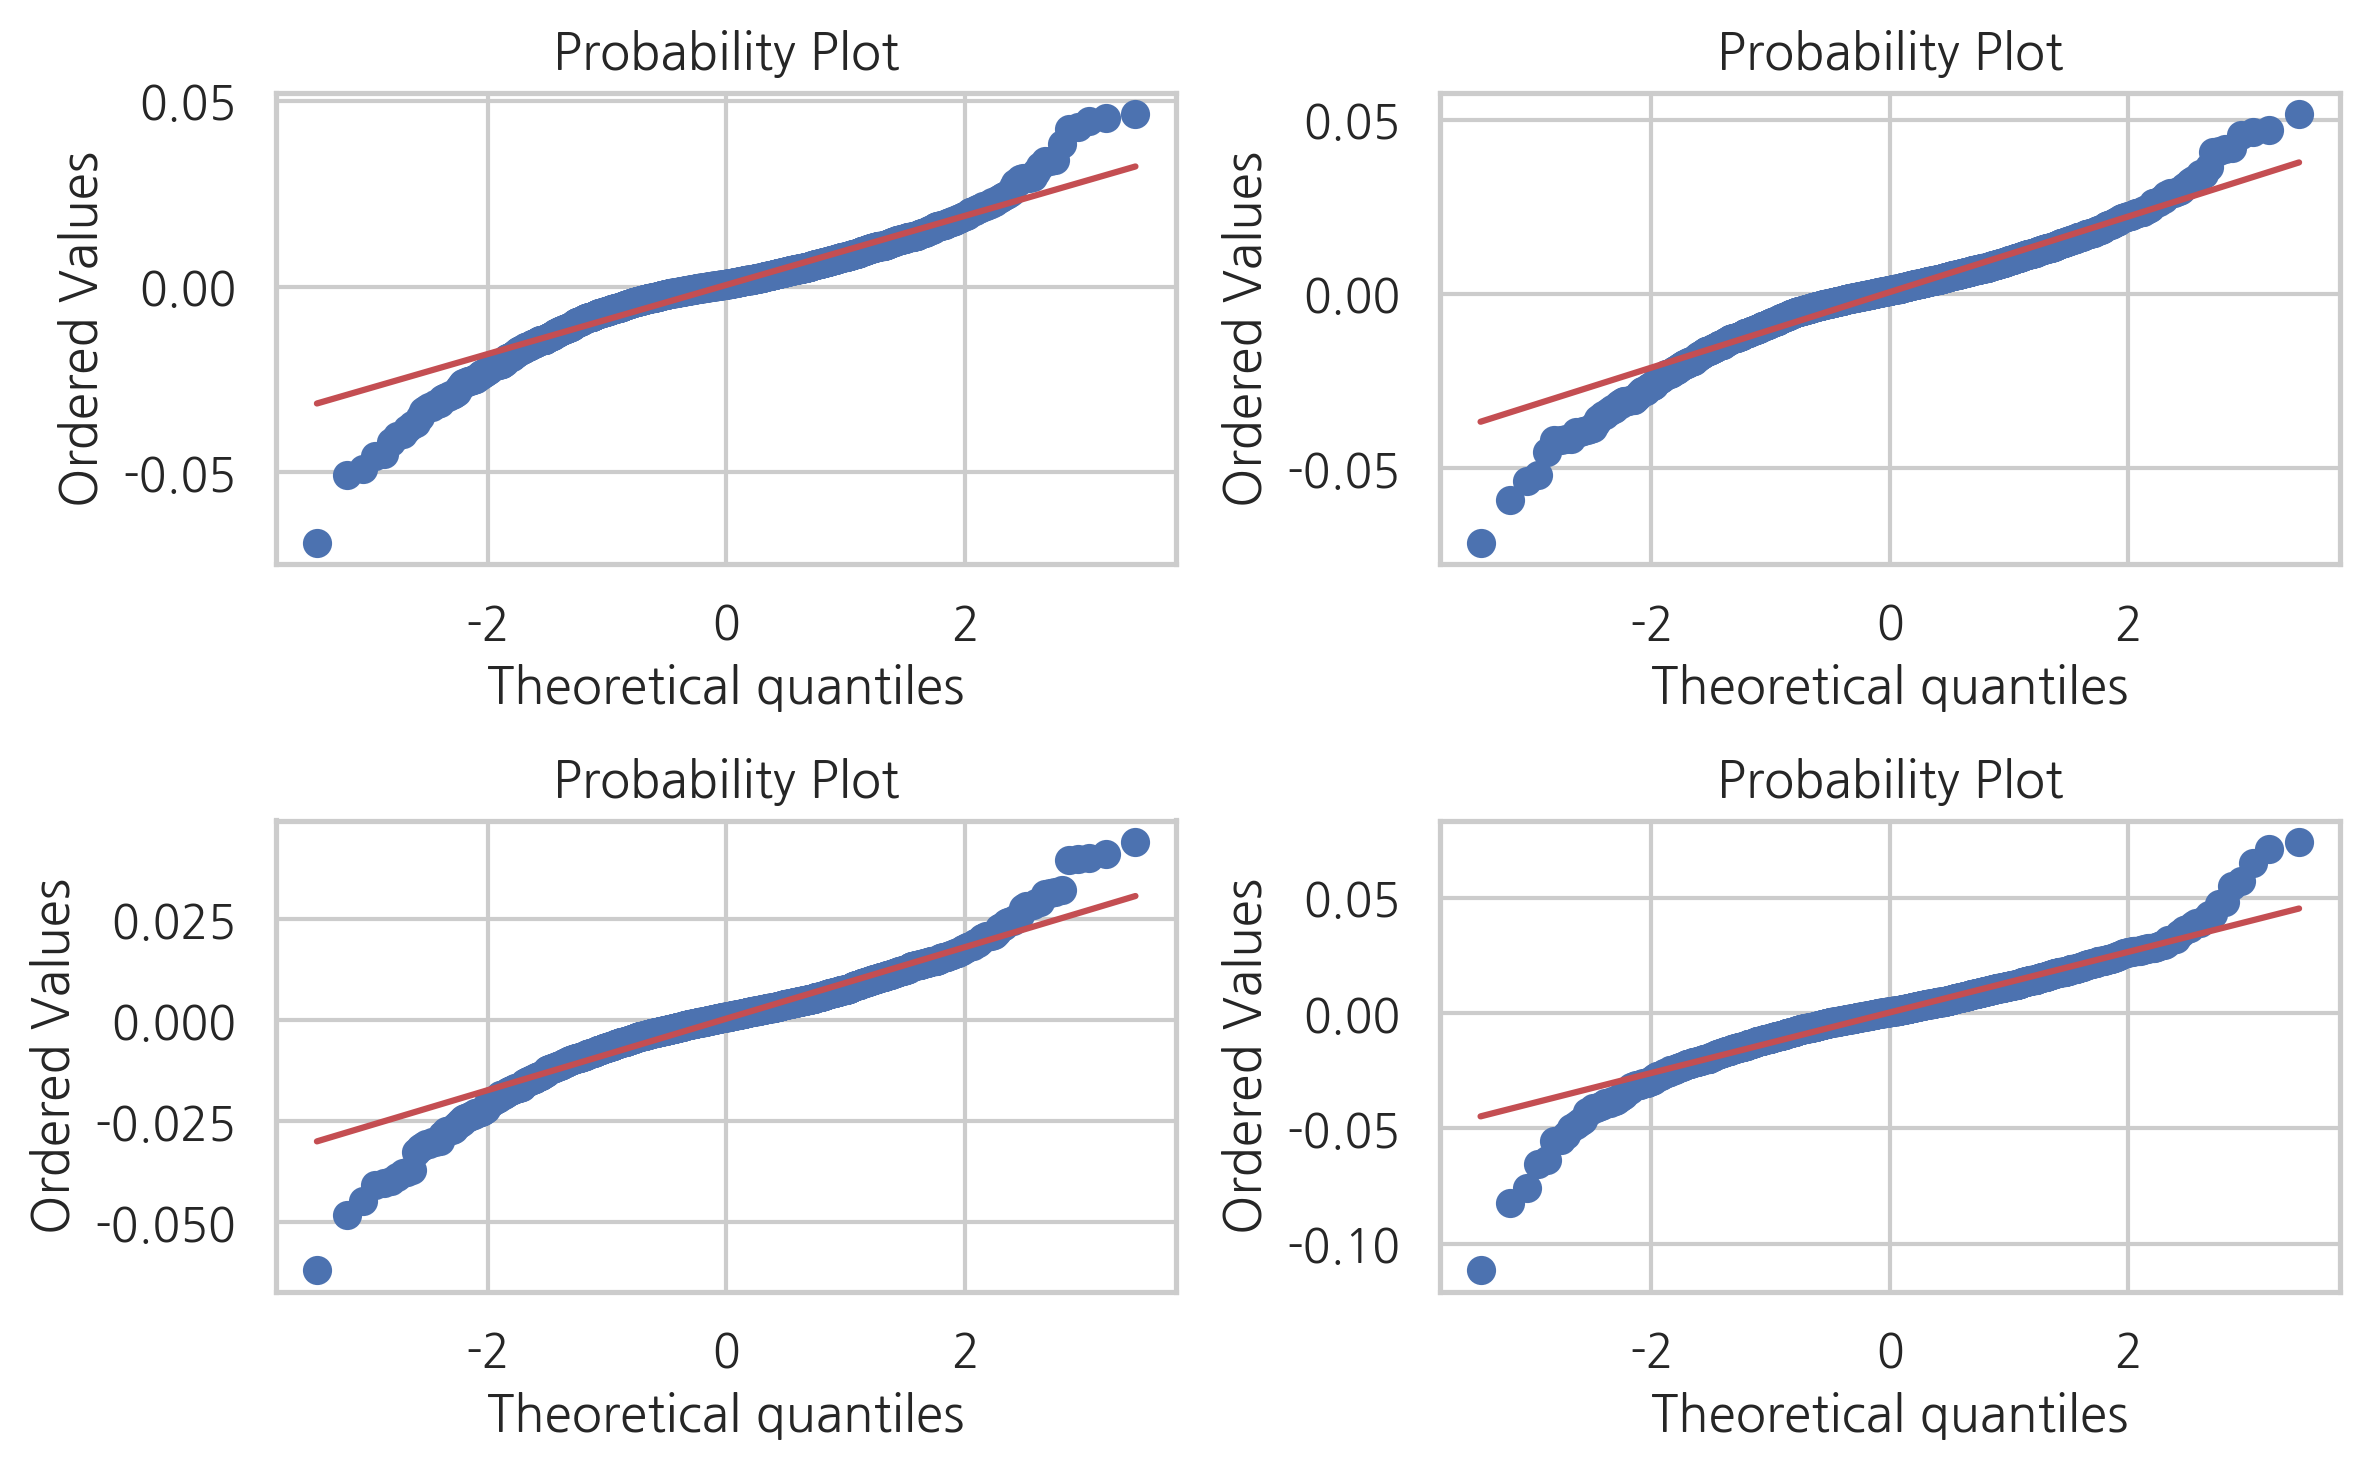

In [3]:
for i, sym in enumerate(symbols):
    ax = plt.subplot(2, 2, i+1)
    sp.stats.probplot(log_returns[sym].dropna(), plot=ax)
plt.tight_layout()
plt.show()

이렇게 팻 테일을 보이는 데이터 모형에 적합한 것이 **스튜던트 t분포(student-t distribution)** 혹은 **t분포**라고 부르는 분포다. 스튜던트 t분포의 확률 밀도 함수는 다음 수식에 의해 정의된다. 

$$
\begin{align}
t(x;\mu, \lambda, \nu) = \frac{\sqrt{\lambda}}{\sqrt{\nu\pi}}\frac{\Gamma\left(\frac{\nu+1}{2}\right)} {\Gamma\left(\frac{\nu}{2}\right)} \left(1+\lambda\frac{(x-\mu)^2}{\nu} \right)^{-\frac{\nu+1}{2}}
\tag{8.5.1}
\end{align}
$$


이 식에서 $\lambda$는 정규분포의 정밀도 $(\sigma^2)^{-1}$에 대응하는 개념이고 $\Gamma(x)$는 감마(Gamma) 함수라는 특수 함수다.

$$
\begin{align}
\Gamma(x) = \int_0^\infty  u^{x-1} e^{-u} du
\tag{8.5.2}
\end{align}
$$

정규분포와 달리 정수값을 가지는 **자유도(degree of freedom)**라는 모수(parameter) $\nu$를 추가적으로 가진다. 스튜던트 t분포에서는 모수 $\nu$로 2 이상의 자연수를 사용한다. 모수 $\nu$가 1인 경우는 **코시분포(Cauchy distribution)**라고 한다. 코시분포에서 양수인 부분만 사용하는 경우에는 **하프코시분포(Half-Cauchy distribution)**라고 부른다.

스튜던트 t분포의 확률 밀도 함수를 그리려면 사이파이 패키지의 `t` 클래스를 사용한다. 이때 인수 `df`는 자유도, `loc`는 기댓값, `scale`은 표준편차를 설정한다. 다음 그림에서 자유도 $\nu$가 작으면 정규분포보다 분산이 크고 팻 테일을 보이지만  자유도가 증가할수록 정규분포로 수렴하는 것을 볼 수 있다.

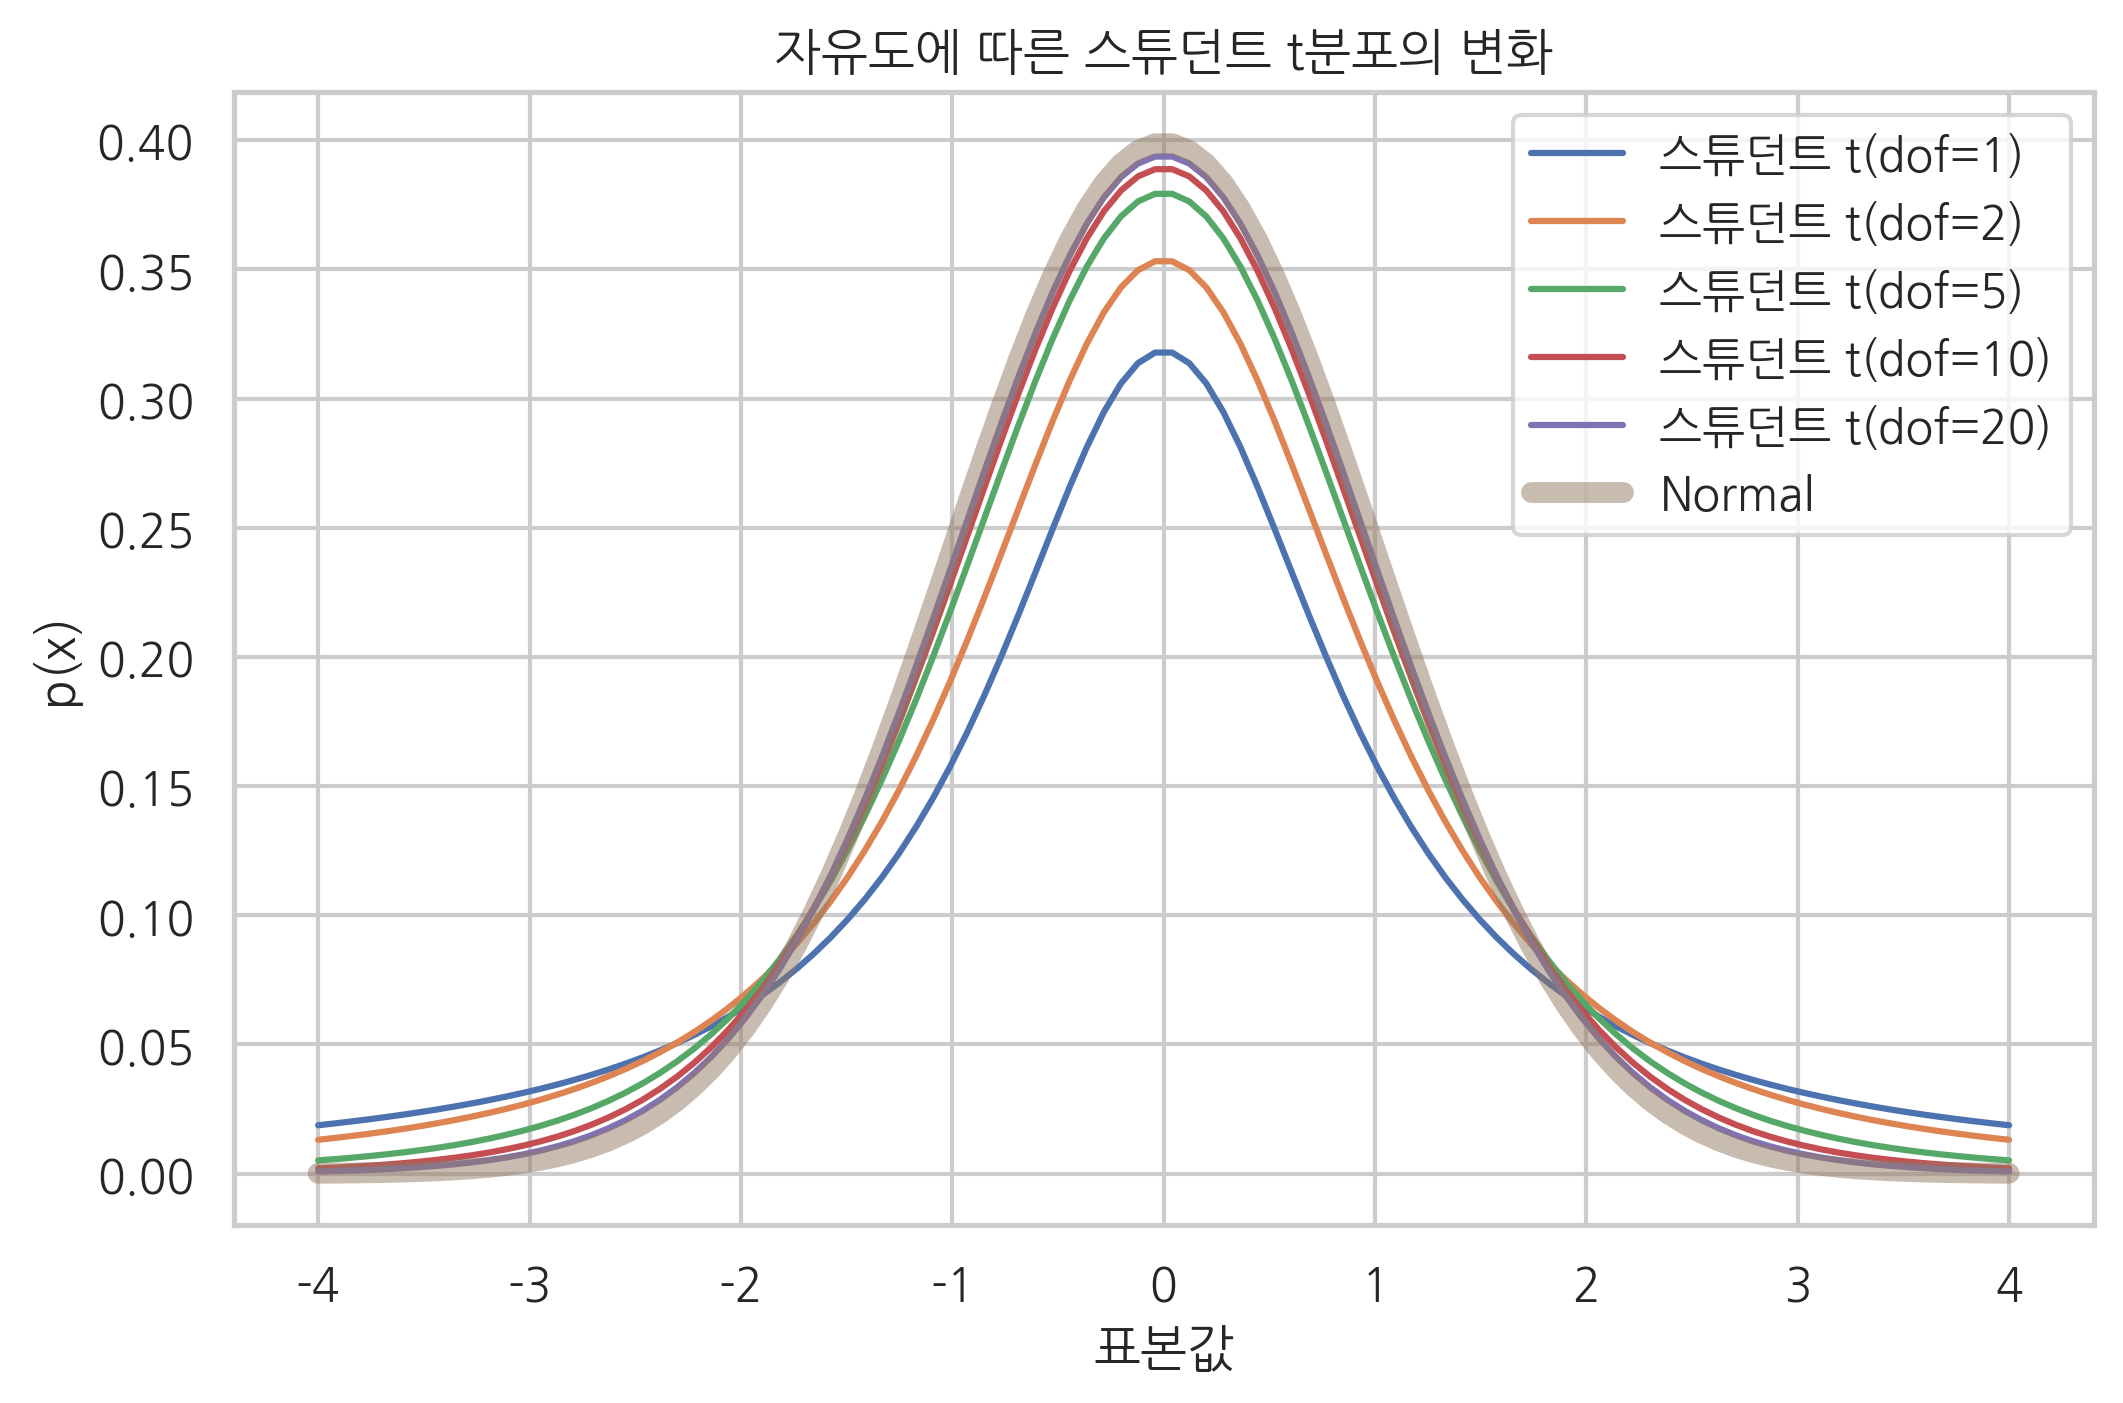

In [4]:
xx = np.linspace(-4, 4, 100)
for df in [1, 2, 5, 10, 20]:
    rv = sp.stats.t(df=df)
    plt.plot(xx, rv.pdf(xx), label=("스튜던트 t(dof=%d)" % df))
plt.plot(xx, sp.stats.norm().pdf(xx), label="Normal", lw=5, alpha=0.5)
plt.title("자유도에 따른 스튜던트 t분포의 변화")
plt.xlabel("표본값")
plt.ylabel("p(x)")
plt.legend()
plt.show()

스튜던트 t분포의 기댓값과 분산은 다음과 같다.

* 기댓값: 
$$
\begin{align}
\text{E}[X] = \mu
\tag{8.5.3}
\end{align}
$$

* 분산:
$$
\begin{align}
\text{Var}[X] = \dfrac{\nu}{\lambda(\nu-2)}
\tag{8.5.4}
\end{align}
$$

분산의 대한 식은 $\nu > 2$ 인 경우만 적용된다. $\nu=1,2$일 때는 분산이 무한대가 된다.

### t 통계량

정규분포의 표본을 표준편차로 나눠 정규화한 $z$ 통계량은 항상 정규분포가 된다는 것은 이미 공부하였다. 그런데 $z$ 통계량을 구하려면 확률분포의 정확한 표준편차를 우리가 알고 있어야 한다. 하지만 현실적으로는 표준편차를 정확히 알 수 없기 때문에 표본에서 측정한 표본표준편차(sample standard deviation)로 정규화할 수밖에 없다. 정규분포로부터 얻은 $N$개의 표본 $x_1, \cdots, x_N$에서 계산한 **표본평균을 표본표준편차로 정규화한 값을 $t$ 통계량**이라고 한다.

**$t$ 통계량은 자유도가 $N-1$인 스튜던트 t분포**를 이룬다. 

$$
\begin{align}
t = \frac{\bar{x} - \mu}{\dfrac{s}{\sqrt{N}}} \sim t \, (x; 0, 1, N - 1)
\tag{8.5.5}
\end{align}
$$

이 식에서 $ \bar{x}, s$은 각각 표본평균, 표본표준편차다.

$$
\begin{align}
\bar{x} = \frac{x_1+\cdots+x_N}{N}
\tag{8.5.6}
\end{align}
$$

$$
\begin{align}
s^2 = \frac{1}{N-1}\sum_{i=1}^N (x_i - \bar{x})^2
\tag{8.5.7}
\end{align}
$$

이 정리는 추후 정규분포의 기댓값에 관한 각종 검정에서 사용된다.

다음은 시뮬레이션을 사용하여 표본표준편차로 정규화한 표본평균과 정규분포를 비교한 것이다. 왼쪽은 $N=4$, 오른쪽은 $N=40$인 경우다.

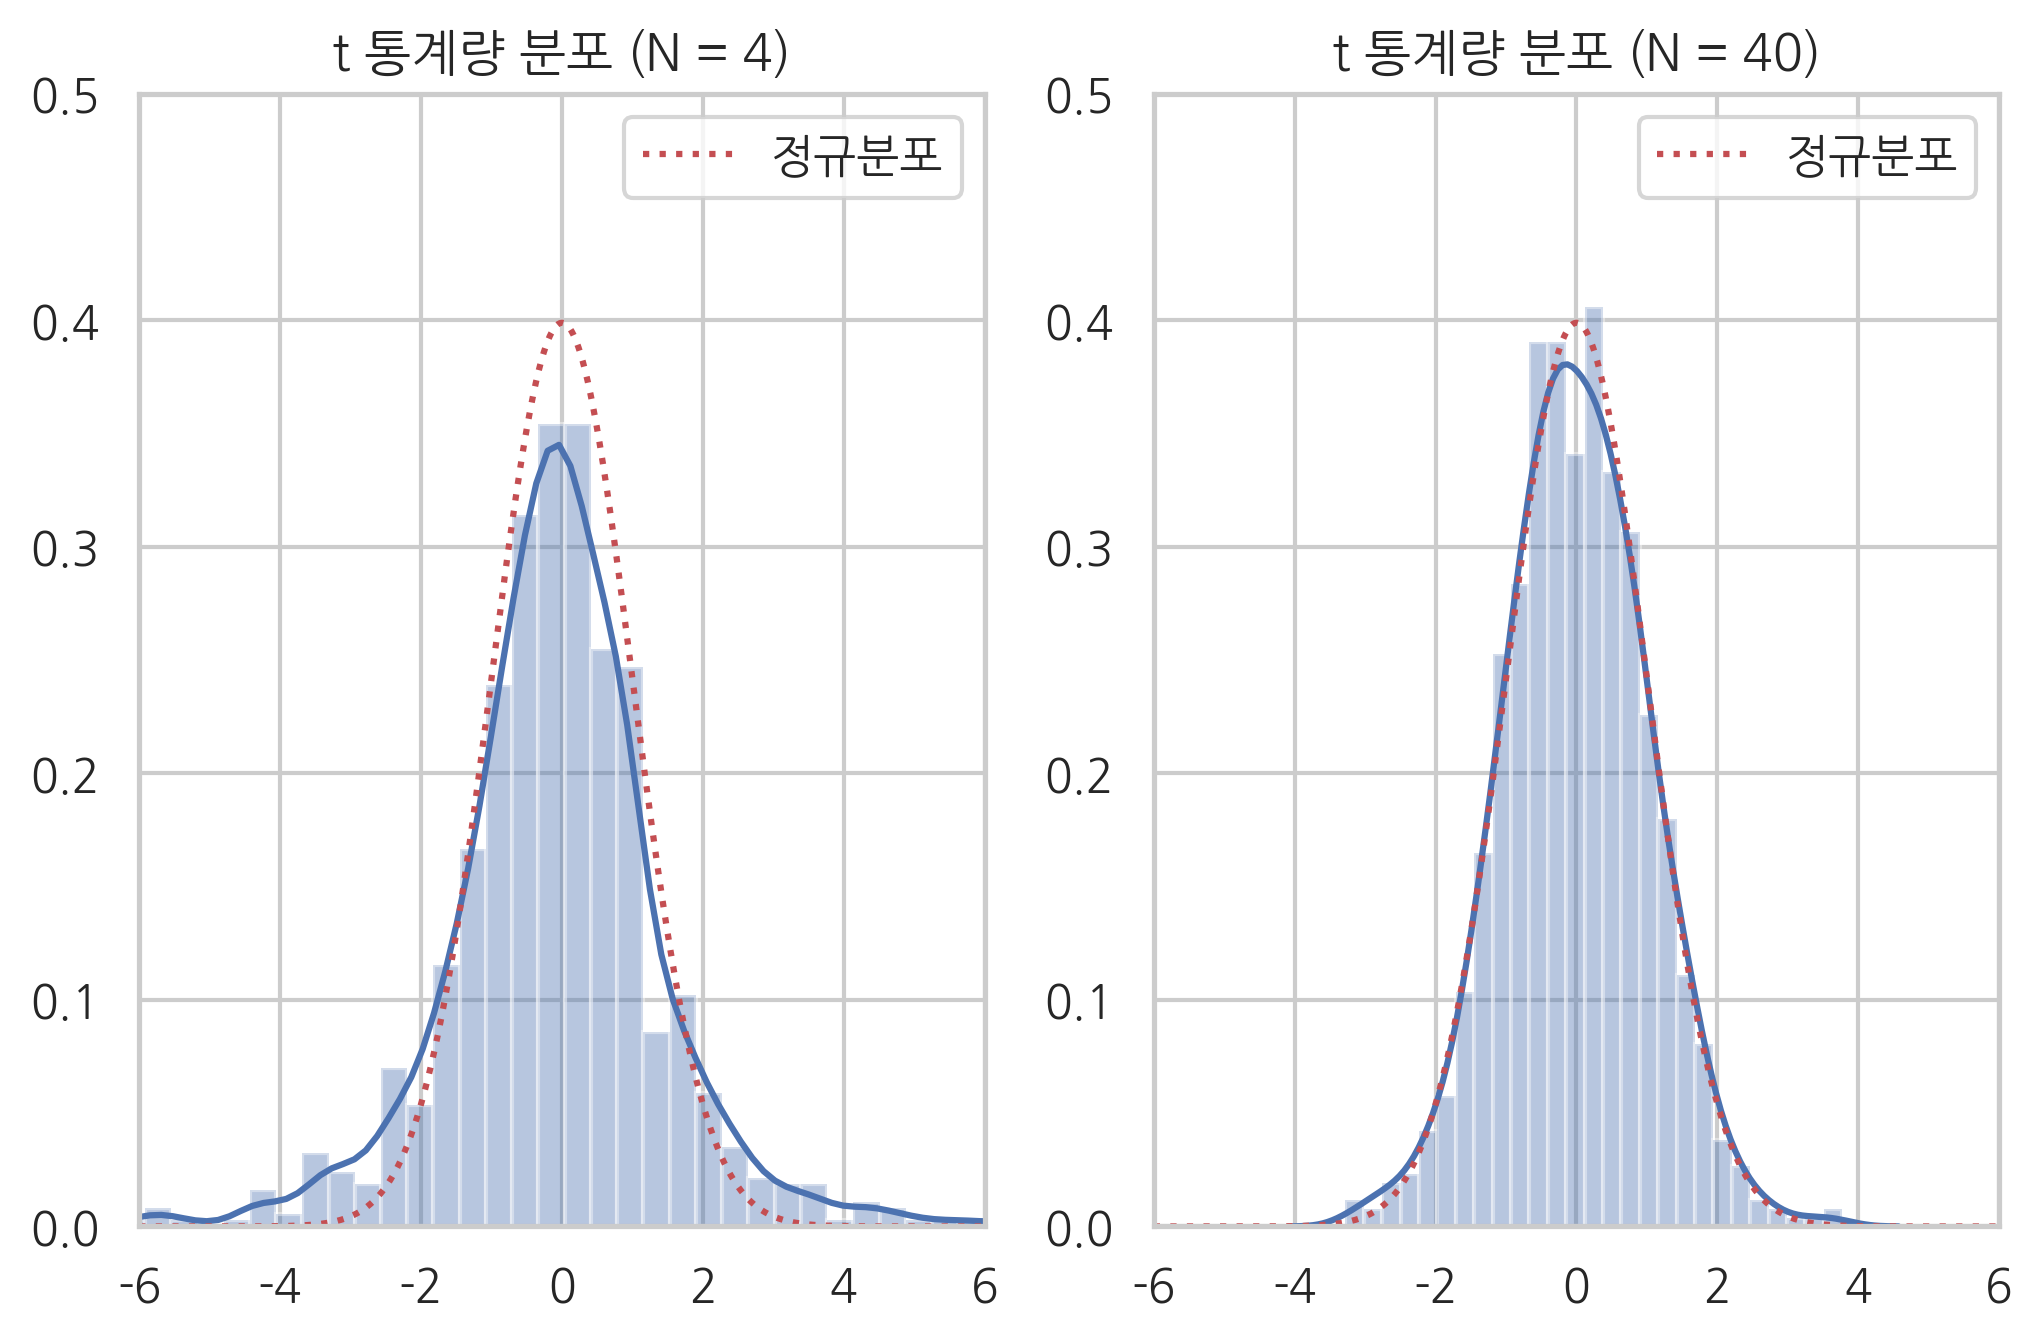

In [5]:
np.random.seed(0)

rv = sp.stats.norm()
M = 1000

plt.subplot(1, 2, 1)
N = 4
x1 = rv.rvs((N, M))
xbar1 = x1.mean(axis=0)
xstd1 = x1.std(axis=0, ddof=1)
x = xbar1 / (xstd1 / np.sqrt(N))
sns.distplot(x, kde=True)
xx = np.linspace(-6, 6, 1000)
plt.plot(xx, rv.pdf(xx), 'r:', label="정규분포")
plt.xlim(-6, 6)
plt.ylim(0, 0.5)
plt.title("t 통계량 분포 (N = 4)")
plt.legend()

plt.subplot(1, 2, 2)
N = 40
x2 = rv.rvs((N, M))
xbar2 = x2.mean(axis=0)
xstd2 = x2.std(axis=0, ddof=1)
x = xbar2 / (xstd2 / np.sqrt(N))
sns.distplot(x, kde=True)
xx = np.linspace(-6, 6, 1000)
plt.plot(xx, rv.pdf(xx), 'r:', label="정규분포")
plt.xlim(-6, 6)
plt.ylim(0, 0.5)
plt.title("t 통계량 분포 (N = 40)")
plt.legend()

plt.show()

### 카이제곱분포

정규분포를 따르는 확률 변수 $X$ 의 $N$개의 표본 $x_1, \cdots, x_N$의 합(또는 평균)은 표본 분산으로 정규화하면 스튜던트 t분포를 따른다는 것을 배웠다. 

그런데 이 $N$개의 표본들을 단순히 더하는 것이 아니라 제곱을 하여 더하면 양수값만을 가지는 분포가 된다. 이 분포를 **카이제곱(chi-squared)분포**라고 하며 $\chi^2(x;\nu)$으로 표기한다. 카이제곱분포도 스튜던트 t분포처럼 자유도 모수를 가진다.

$$
\begin{align}
x_i \sim \mathcal{N}(x)
\tag{8.5.8}
\end{align}
$$
$$
\begin{align}
\downarrow
\tag{8.5.9}
\end{align}
$$
$$
\begin{align}
\sum_{i=1}^N x_i^2 \sim \chi^2(x;\nu=N)
\tag{8.5.10}
\end{align}
$$


카이제곱분포의 확률 밀도 함수는 다음과 같다.

$$
\begin{align}
\chi^2(x; \nu) = \frac{x^{(\nu/2-1)} e^{-x/2}}{2^{\nu/2} \Gamma\left(\frac{\nu}{2}\right)}
\tag{8.5.11}
\end{align}
$$

사이파이 stats 서브패키지의 `chi2` 클래스를 사용하여 확률 밀도 함수의 모양을 살펴보면 다음과 같다.

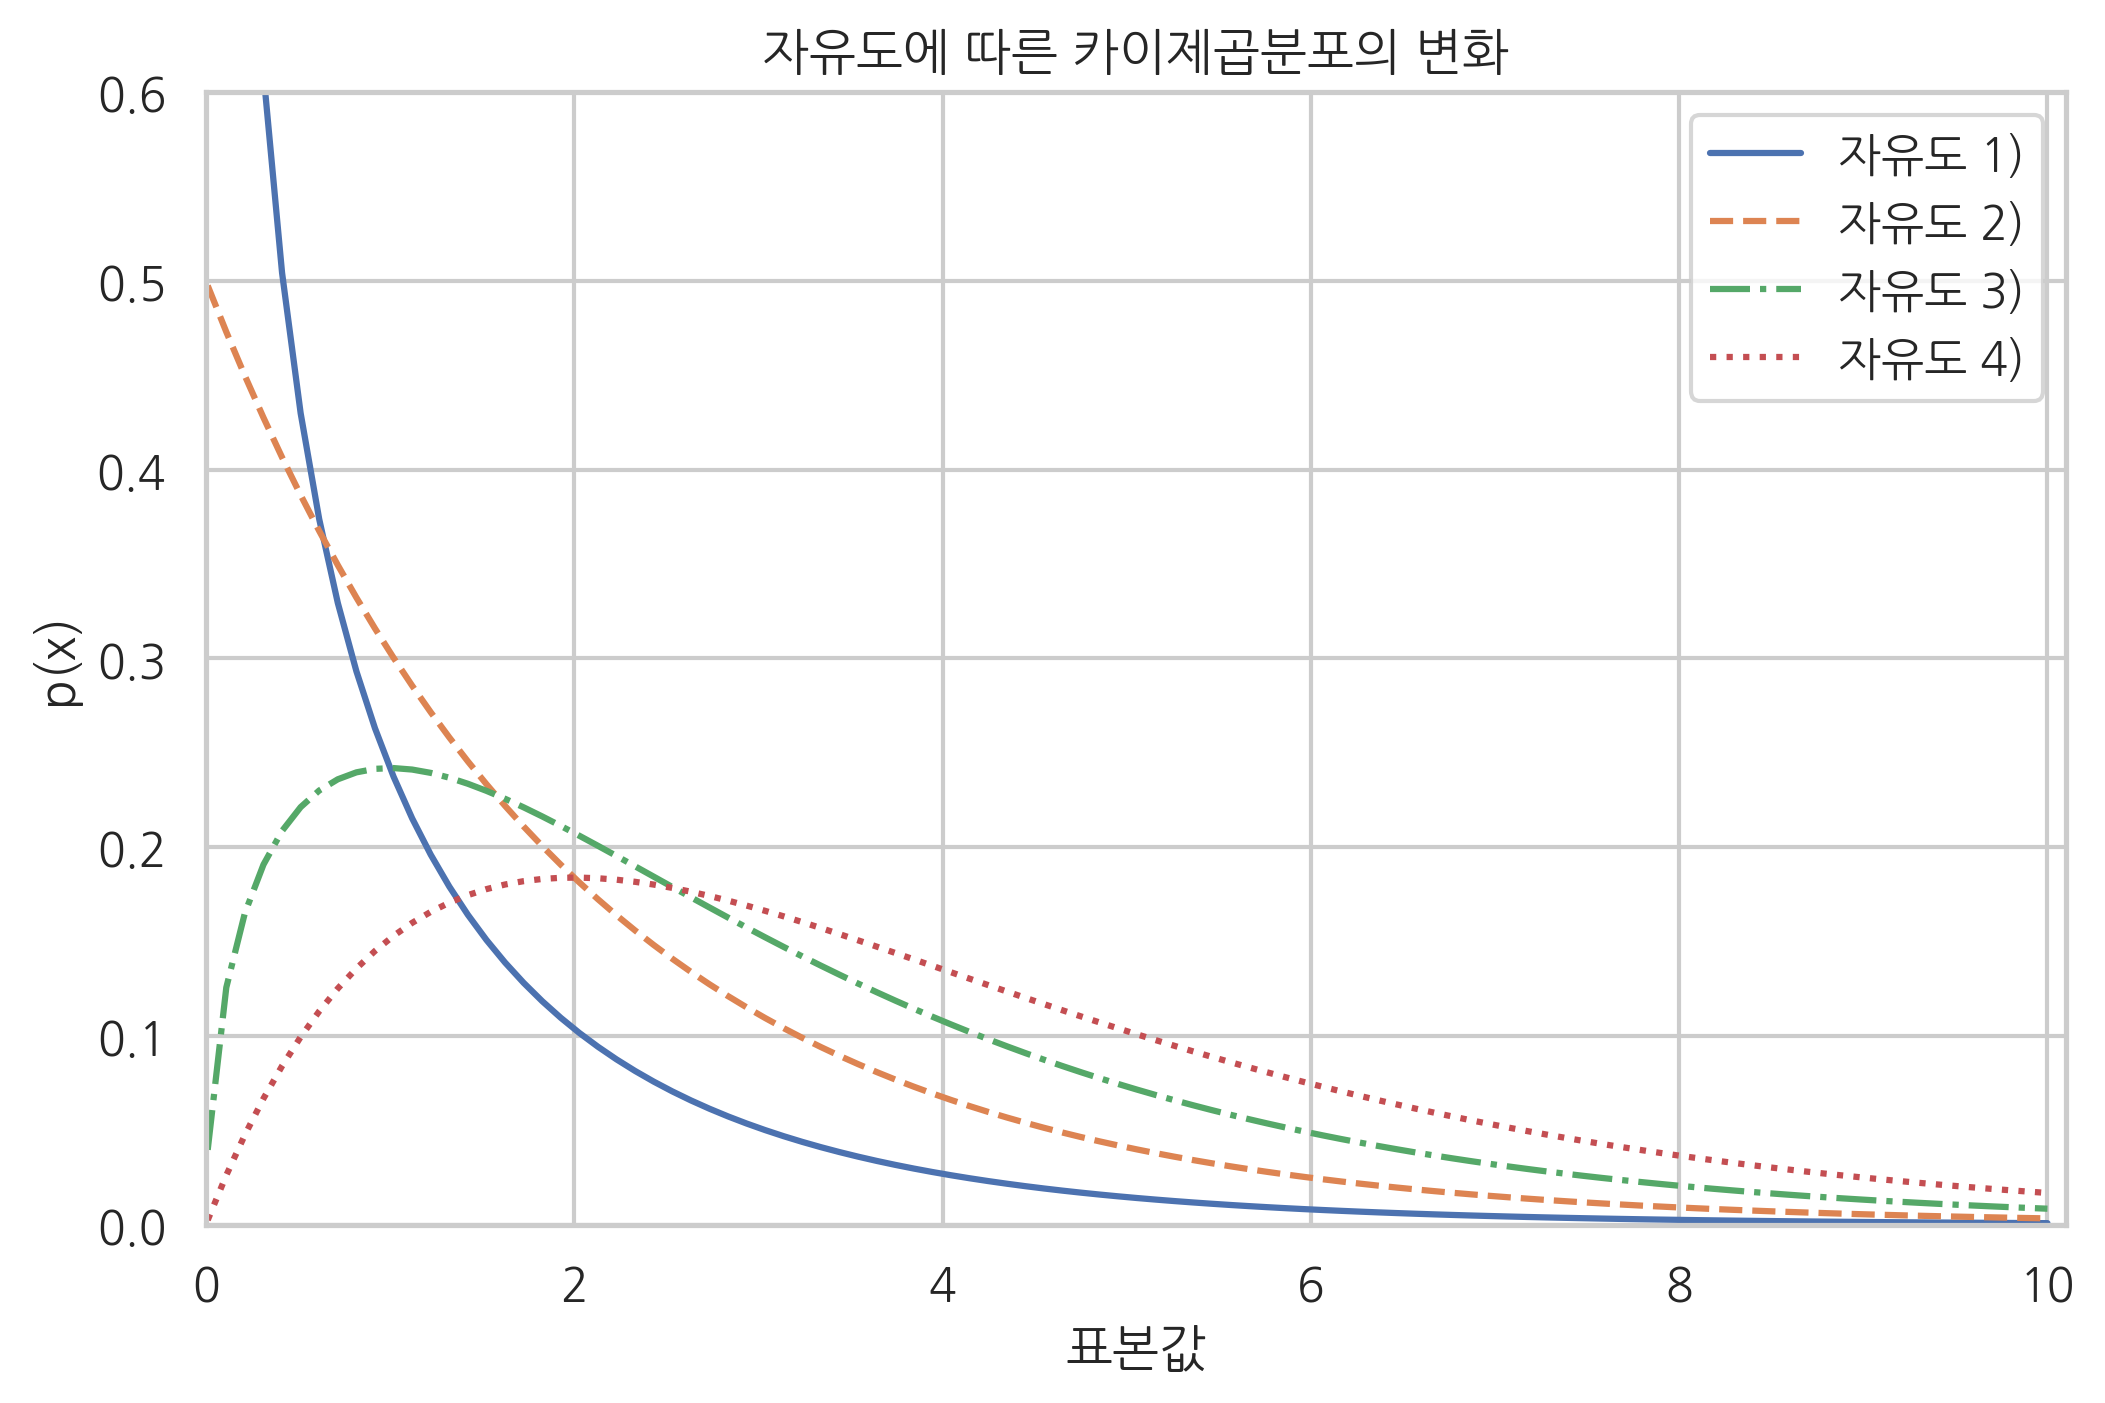

In [6]:
xx = np.linspace(0.01, 10, 100)
dfs = np.arange(1, 5)
lss = ["-", "--", "-.", ":"]
for df, ls in zip(dfs, lss):
    rv = sp.stats.chi2(df=df)
    plt.plot(xx, rv.pdf(xx), ls=ls, label=("자유도 %d)" % df))
plt.xlim(0, 10.1)
plt.ylim(0, 0.6)
plt.title("자유도에 따른 카이제곱분포의 변화")
plt.xlabel("표본값")
plt.ylabel("p(x)")
plt.legend()
plt.show()

카이제곱분포에서 특이한 점은 제곱합을 하는 표본 수가 2보다 커지면 0근처의 값이 가장 많이 발생할 것이라는 직관과 달리 0보다 큰 어떤 수가 더 흔하게 발생한다는 점이다. 시뮬레이션을 통해 실제로 제곱합의 분포를 살펴보면 다음과 같다. 왼쪽은 정규분포의 표본을 단순히 제곱한 값의 분포이고 오른쪽은 정규분포의 표본 4개를 제곱하여 합한 값의 분포다. 오른쪽 분포는 0이 아닌 1 근처의 값이 가장 많이 나오는 것을 볼 수 있다.

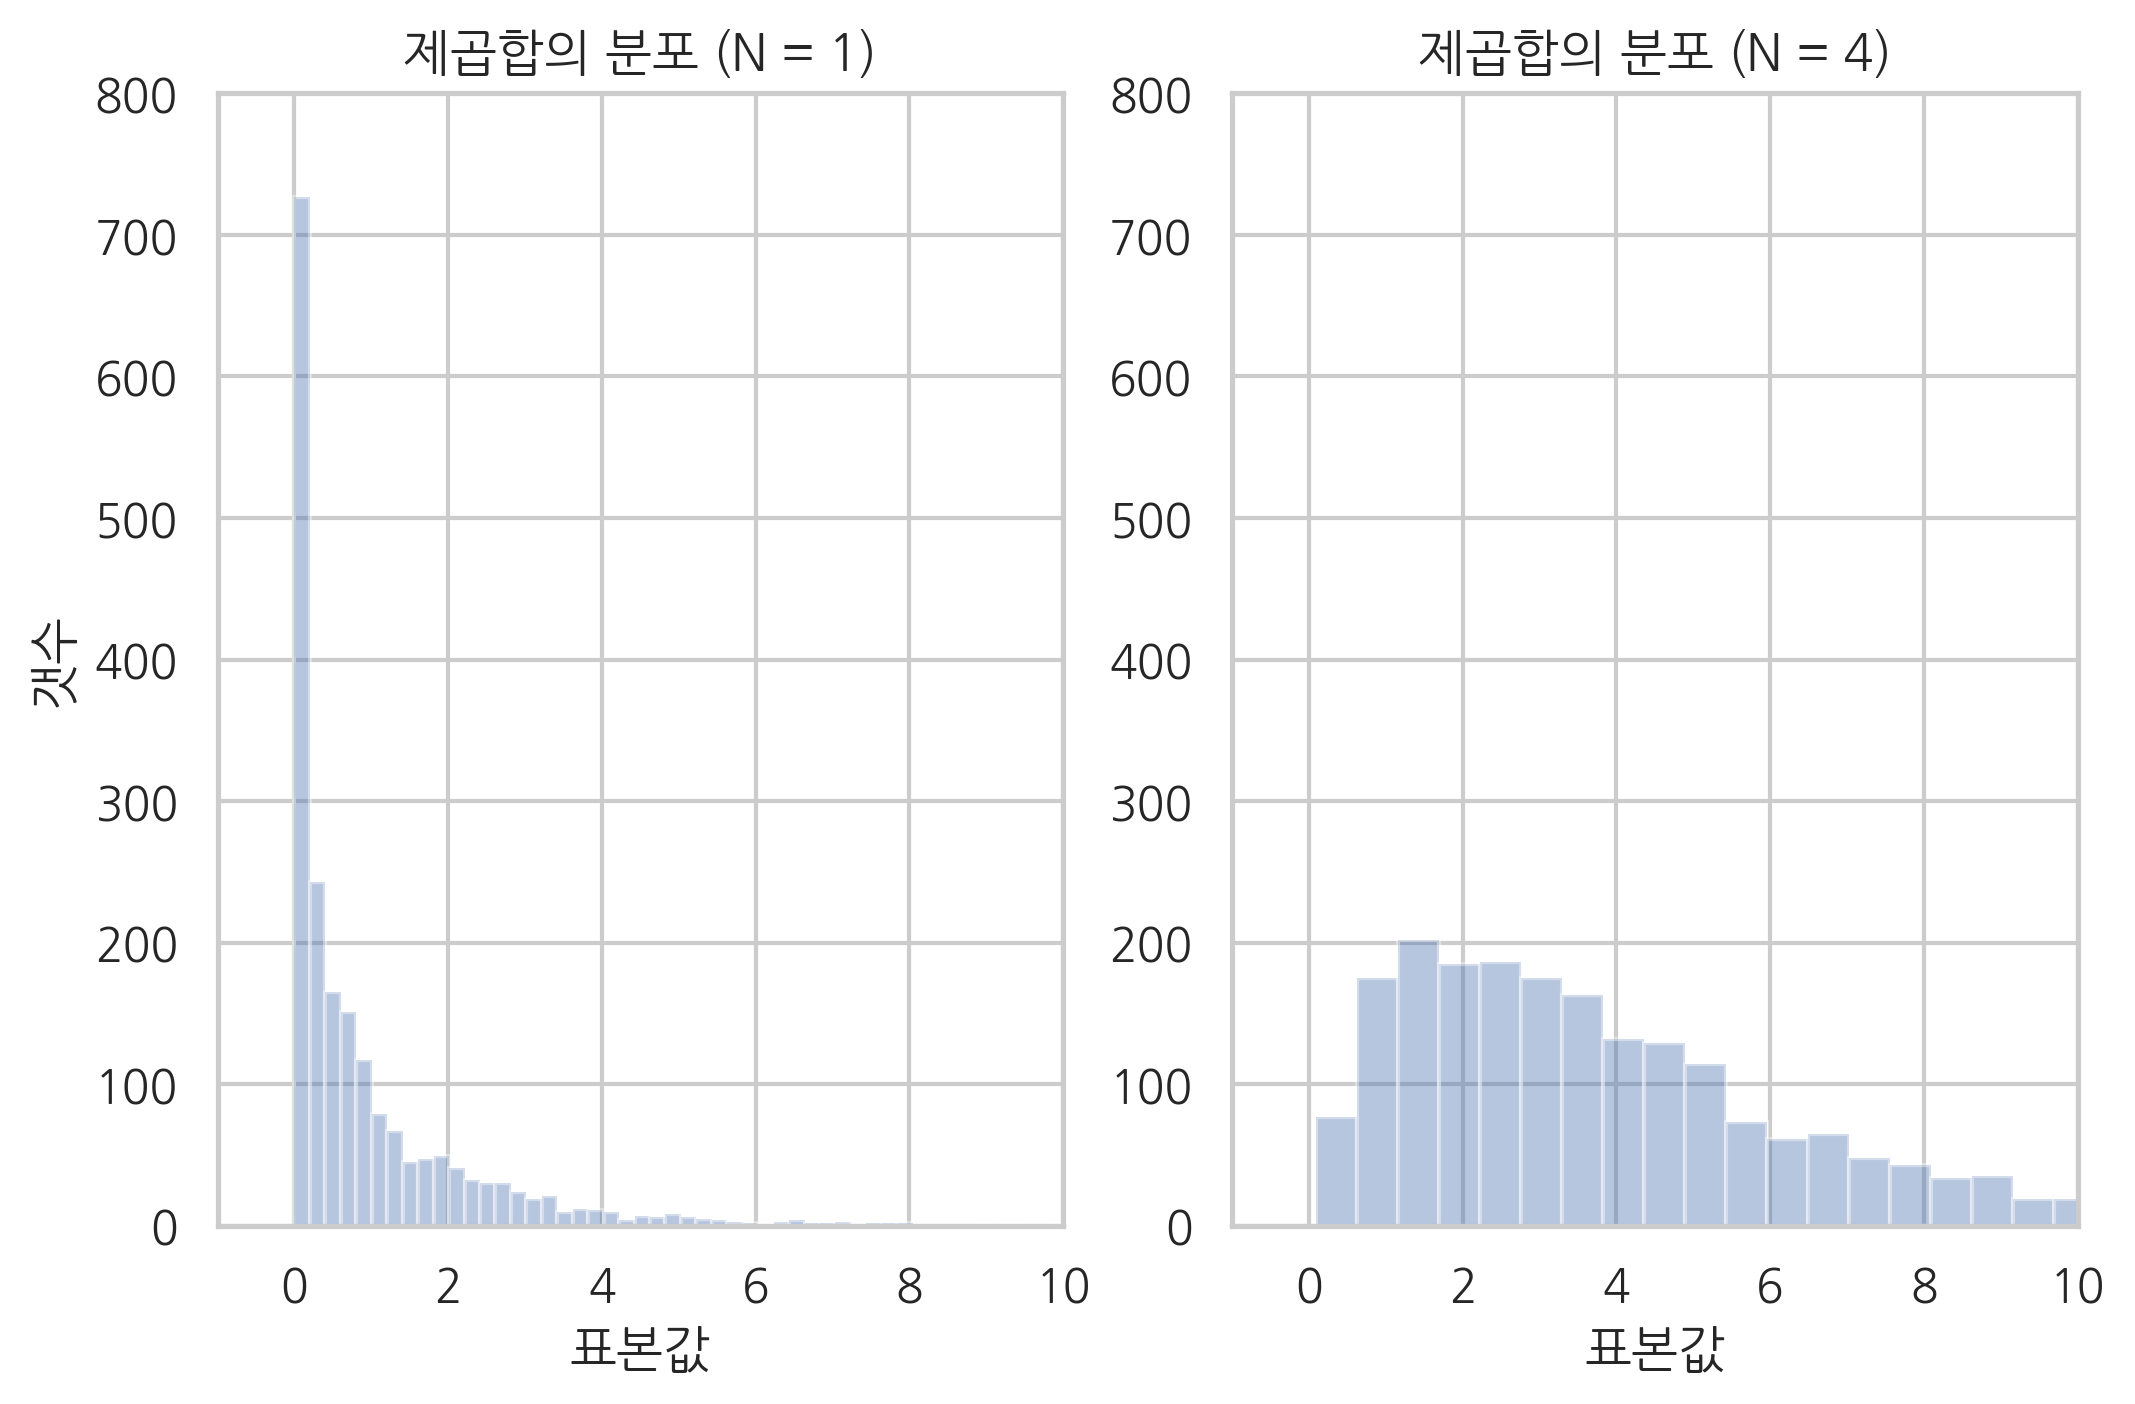

In [7]:
np.random.seed(0)

rv = sp.stats.norm()
M = 2000

plt.subplot(1, 2, 1)
N = 1
x = rv.rvs((N, M))
t = (x ** 2).sum(axis=0)
sns.distplot(t, kde=False)
plt.xlim(-1, 10)
plt.ylim(0, 800)
plt.title("제곱합의 분포 (N = 1)")
plt.xlabel("표본값")
plt.ylabel("갯수")

plt.subplot(1, 2, 2)
N = 4
x = rv.rvs((N, M))
t = (x ** 2).sum(axis=0)
sns.distplot(t, kde=False)
plt.xlim(-1, 10)
plt.ylim(0, 800)
plt.title("제곱합의 분포 (N = 4)")
plt.xlabel("표본값")

plt.show()

#### 연습 문제 8.5.1

왜 위와 같은 현상이 발생하는 것일까? 이를 알아보기 위해 $N$이 다음과 같을 때 정규분포에서 나온 표본의 제곱합이 이루는 분포를 구하고 히스토그램으로 나타내라.

1. $N=6$일 때
2. $N=30$일 때

### F분포

스튜던트 t분포와 카이제곱분포는 정규분포를 따르는 확률 변수 $X$로부터 나온 $N$개의 표본에서 만들 수 있었다.

이와 비슷하게 **카이제곱분포를 따르는 독립적인 두 개의 확률 변수 $\chi^2_1(x;N_1)$와 $\chi^2_2(x;N_2)$의 확률 변수 표본을 각각 $x_1$, $x_2$이라고 할 때 이를 각각 $N_1$, $N_2$로 나눈 뒤 비율을 구하면 $F(x;N_1, N_2)$ 분포**가 된다. $N_1$, $N_2$는 F분포의 자유도 모수라고 한다.

$$
\begin{align}
x_1 \sim \chi^2(N_1),\, x_2 \sim \chi^2(N_2) \;\; \rightarrow \;\; \frac{\frac{x_1}{N_1}}{\frac{x_2}{N_2}} \sim F(x; N_1, N_2)
\tag{8.5.12}
\end{align}
$$

F분포의 확률밀도함수는 다음과 같다.

$$ 
\begin{align}
f(x; N_1,N_2) = \dfrac{\sqrt{\dfrac{(N_1\,x)^{N_1}\,\,N_2^{N_2}} {(N_1\,x+N_2)^{N_1+N_2}}}} {x\;\text{B}\left(\frac{N_1}{2},\frac{N_2}{2}\right)} 
\tag{8.5.13}
\end{align}
$$

이 식에서 함수 $B(x)$는 베타(Beta) 함수라는 특수 함수다.

스튜던트 t분포의 표본값을 제곱한 값은 F분포를 따른다.

$$
\begin{align}
t(N)^2 = F(1, N)
\tag{8.5.14}
\end{align}
$$

사이파이 stats 서브패키지의 `f` 클래스는 F분포를 지원한다. 다음 그림에서 몇가지 자유도 쌍에 대한 F분포의 모양을 보이고 있다.

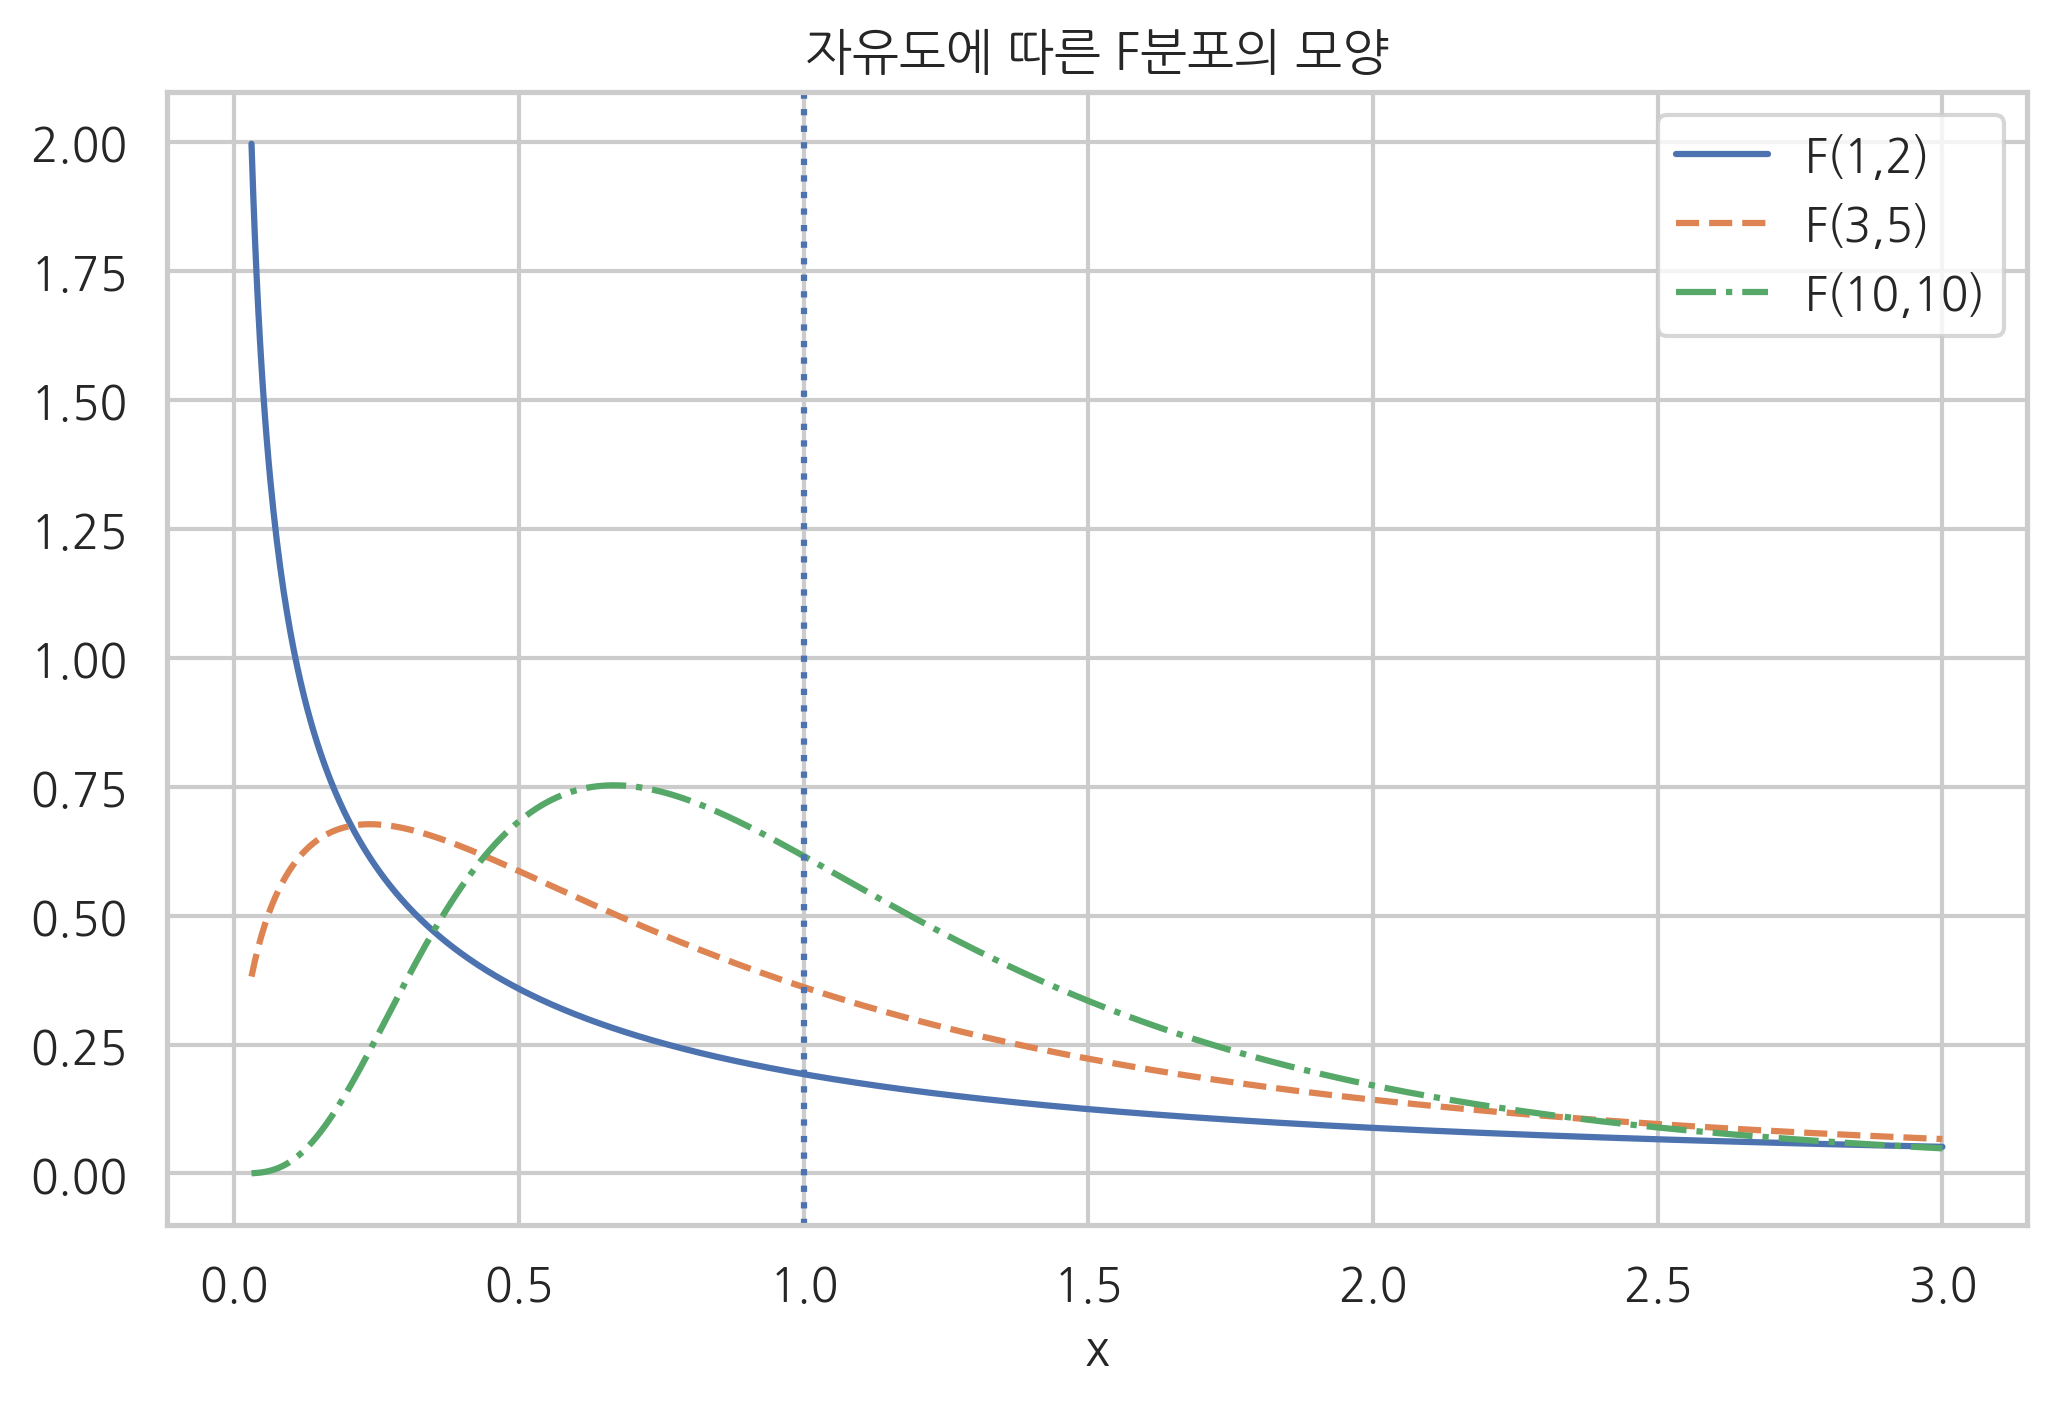

In [8]:
xx = np.linspace(0.03, 3, 1000)
plt.plot(xx, sp.stats.f(1, 2).pdf(xx), ls="-", label="F(1,2)")
plt.plot(xx, sp.stats.f(3, 5).pdf(xx), ls="--", label="F(3,5)")
plt.plot(xx, sp.stats.f(10, 10).pdf(xx), ls="-.", label="F(10,10)")
plt.axvline(1, ls=":")
plt.xlabel("x")
plt.title("자유도에 따른 F분포의 모양")
plt.legend()
plt.show()

F분포에서 특이한 점은 $N_1$과 $N_2$의 값이 같을 경우에 $1$ 근처의 값이 가장 많이 발생할 것이라는 직관과 달리 $1$이 아닌 다른 수가 더 흔하게 발생한다는 점이다. 시뮬레이션을 통해 실제로 제곱합의 비율의 분포를 살펴보면 다음과 같다. $N_1=N_2$이 커지면 이 현상이 사라지고 $1$ 근처의 값이 가장 많이 발생한다.

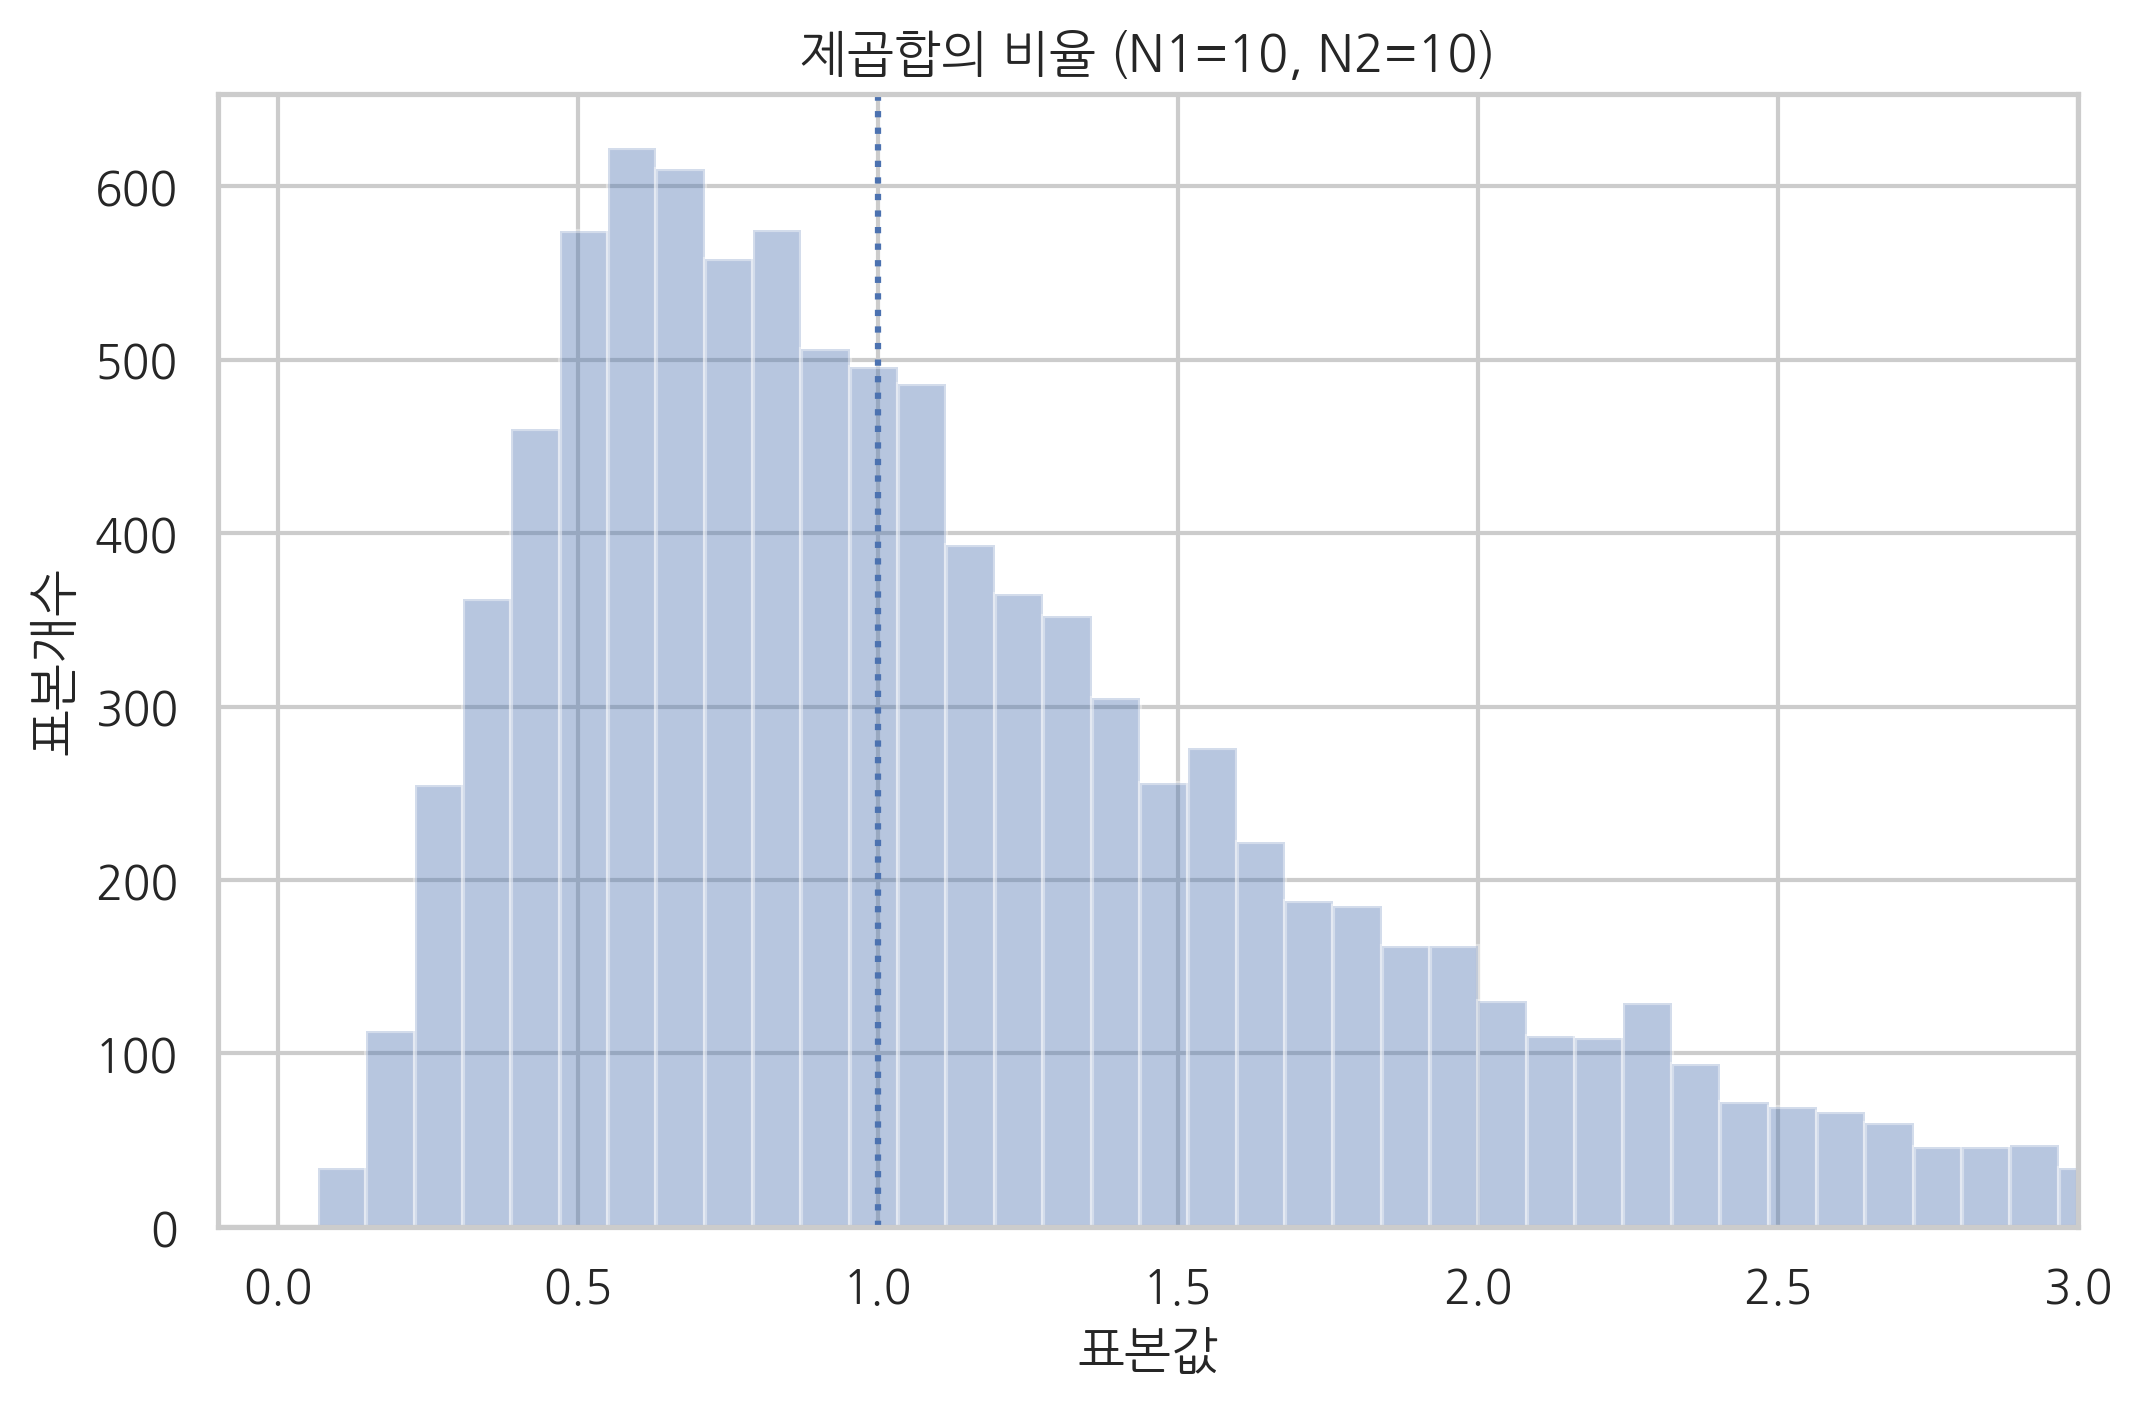

In [9]:
np.random.seed(0)

rv = sp.stats.norm()
M = 10000

N1 = 10
x1 = rv.rvs((N1, M))
t1 = (x1 ** 2).sum(axis=0)

N2 = 10
x2 = rv.rvs((N2, M))
t2 = (x2 ** 2).sum(axis=0)

t = t2 / t1
sns.distplot(t, bins=200, kde=False)
plt.axvline(1, ls=":");
plt.xlim(-0.1, 3)
plt.title("제곱합의 비율 (N1=10, N2=10)")
plt.xlabel("표본값")
plt.ylabel("표본개수")
plt.show()

#### 연습 문제 8.5.2

자유도 $N$이 다음과 같을 때 스튜던트 t분포에서 나온 값의 제곱이 이루는 분포를 시뮬레이션으로 구하고 그 히스토그램을 $(1,N)-$자유도의 F분포와 비교하라.

1. $N=2$일 때
2. $N=30$일 때

### 활용

스튜던트 t분포, 카이제곱분포, F분포는 모두 정규분포의 통계량 분포(statistics distribution)의 일종이다. 선형회귀분석에서 이 통계량 분포들은 각각 다음 값에 대한 확률모형으로 사용된다.

* 스튜던트 t분포: 추정된 가중치에 대한 확률 분포
* 카이제곱분포: 오차 제곱합에 대한 확률 분포
* F분포: 비교 대상이 되는 선형모형의 오차 제곱합에 대한 비율의 확률 분포

<img src="https://datascienceschool.net/upfiles/adf2c80f3c8a4a0f9ec76800ffc4bb65.png" style="width:100%;">

그림 8.5.1 : 정규분포와 통계량 분포의 관계